<a href="https://colab.research.google.com/github/kirillspiney/projects/blob/main/statistics/w_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

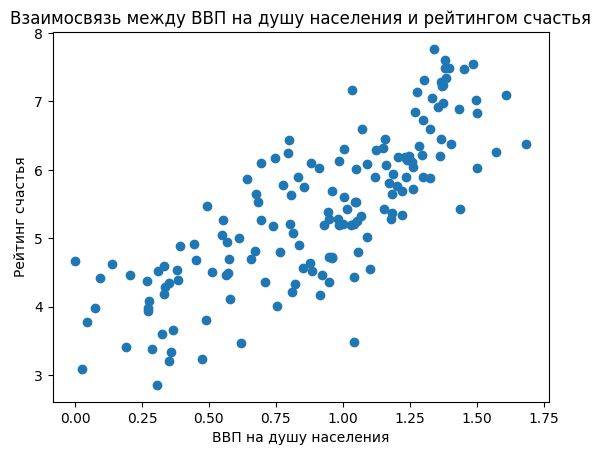

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/2019.csv")

plt.scatter(df["GDP per capita"], df["Score"])
plt.xlabel("ВВП на душу населения")
plt.ylabel("Рейтинг счастья")
plt.title("Взаимосвязь между ВВП на душу населения и рейтингом счастья")
plt.show()

**Возможная гипотеза:** имеется корреляция между ВВП на душу населения и уровнем счастья.



---



<ipython-input-62-0ee1fe139625>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



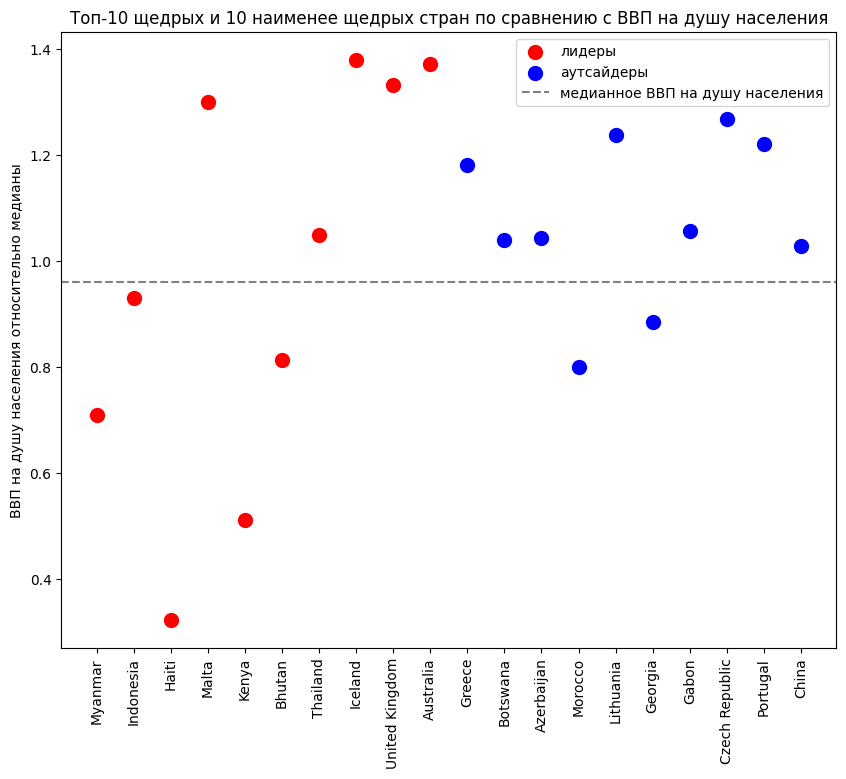

In [ ]:
median_gdp = df['GDP per capita'].median()

# топ-10 самых щедрых и топ-10 наименее щедрых стран
top_generosity = df.sort_values('Generosity', ascending=False).head(10)
bottom_generosity = df.sort_values('Generosity').head(10)

# выбираем нужные столбцы
top_generosity = top_generosity[['Country or region', 'GDP per capita']]
bottom_generosity = bottom_generosity[['Country or region', 'GDP per capita']]

# добавляем столбец с меткой top/bottom для группировки
top_generosity['label'] = 'лидеры'
bottom_generosity['label'] = 'аутсайдеры'

# объединяем датафреймы
merged_df = pd.concat([top_generosity, bottom_generosity])

# создаем график
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'лидеры': 'red', 'аутсайдеры': 'blue'}
for label, color in colors.items():
    subset = merged_df[merged_df['label'] == label]
    ax.scatter(x='Country or region', y='GDP per capita', data=subset, c=color, label=label, s=100)
ax.axhline(y=median_gdp, color='gray', linestyle='--', label='медианное ВВП на душу населения')
ax.set_xticklabels(merged_df['Country or region'], rotation=90)
ax.set_ylabel('ВВП на душу населения относительно медианы')
ax.legend()
plt.title('Топ-10 щедрых и 10 наименее щедрых стран по сравнению с ВВП на душу населения')
plt.show()

Интересно, что страны с наименьшим значением показателя Generosity имеют в среднем более высокие относительно медианного значения показатели ВВП на душу населения, при этом в Топ-10 такой ситуации не наблюдается. Исходя из этого, можно выдвинуть **2 гипотезы:**
1. В странах с высоким уровнем ВВП люди ставят на первое место экономическую производительность и успех, в то время как в странах с более низким уровнем ВВП люди более ориентированы на общественные связи и поддержку друг друга.
2. Высокий уровень ВВП позволяет государству обеспечивать социальные программы и благосостояние, что может сокращать необходимость в общественной поддержке и взаимопомощи, в то время как в странах с более низким уровнем ВВП люди могут сталкиваться с более трудными жизненными условиями и большей необходимостью взаимопомощи.



---




In [ ]:
import plotly.express as px

fig = px.choropleth(df, locations="Country or region", locationmode="country names", color="Score", 
                    hover_name="Country or region", title='Распределение рейтинга счастья по странам',
                    color_continuous_scale=[(0, "#F7FBEE"), (0.5, "#74C476"), (1, "#006D2C")])
fig.show()

Красивое распределение уровня счастья по миру. Можно видеть, например, что в среднем уровень счастья выше в странах Северной и Южной Америки, а также в Европе. Наиболее низкие уровни счастья в Африке, а также в части азиатского региона. Из этого можно предположить ряд **гипотез**, таких как зависимость уровня счастья от региона и тд.


---



In [ ]:
top10 = df.sort_values(by='Score', ascending=False).head(10)

median_value = df['Perceptions of corruption'].median()

fig = px.bar(top10, x='Country or region', y='Perceptions of corruption', color='Country or region',
             title='Топ-10 самых счастливых стран по показателю коррупции')

fig.add_shape(type='line',
              x0=-0.5,
              y0=median_value,
              x1=9.5,
              y1=median_value,
              line=dict(color='red', width=3, dash='dot'))

fig.update_layout(showlegend=False, xaxis_title='Страны', yaxis_title='Восприятие коррупции')

fig.show()

На графике видно, что существует значительный разброс в оценках коррупции в топ-10 самых счастливых стран. Можно вывести **гипотезу**, что это связано с различиями в системах управления, экономических условиях, культурных различиях или других факторах, которые влияют на восприятие коррупции в этих странах. Также можно увидеть такого аутсайдера, как Исландия, на графике и проанализировать эту страну подробнее для выяснения причин такой низкой оценки.